In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

import warnings
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [2]:
brca = pd.read_csv('input/brca.csv')
brca

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [3]:
brca = brca.drop('Unnamed: 0', axis=1)

for col in brca.columns:
    if col.startswith('x.'):
        new_col = col[2:]
        brca = brca.rename(columns={col: new_col})

In [4]:
brca.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_pts_mean', 'symmetry_mean', 'fractal_dim_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_pts_se', 'symmetry_se',
       'fractal_dim_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_pts_worst', 'symmetry_worst',
       'fractal_dim_worst', 'y'],
      dtype='object')

In [5]:
brca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius_mean        569 non-null    float64
 1   texture_mean       569 non-null    float64
 2   perimeter_mean     569 non-null    float64
 3   area_mean          569 non-null    float64
 4   smoothness_mean    569 non-null    float64
 5   compactness_mean   569 non-null    float64
 6   concavity_mean     569 non-null    float64
 7   concave_pts_mean   569 non-null    float64
 8   symmetry_mean      569 non-null    float64
 9   fractal_dim_mean   569 non-null    float64
 10  radius_se          569 non-null    float64
 11  texture_se         569 non-null    float64
 12  perimeter_se       569 non-null    float64
 13  area_se            569 non-null    float64
 14  smoothness_se      569 non-null    float64
 15  compactness_se     569 non-null    float64
 16  concavity_se       569 non

In [6]:
brca.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


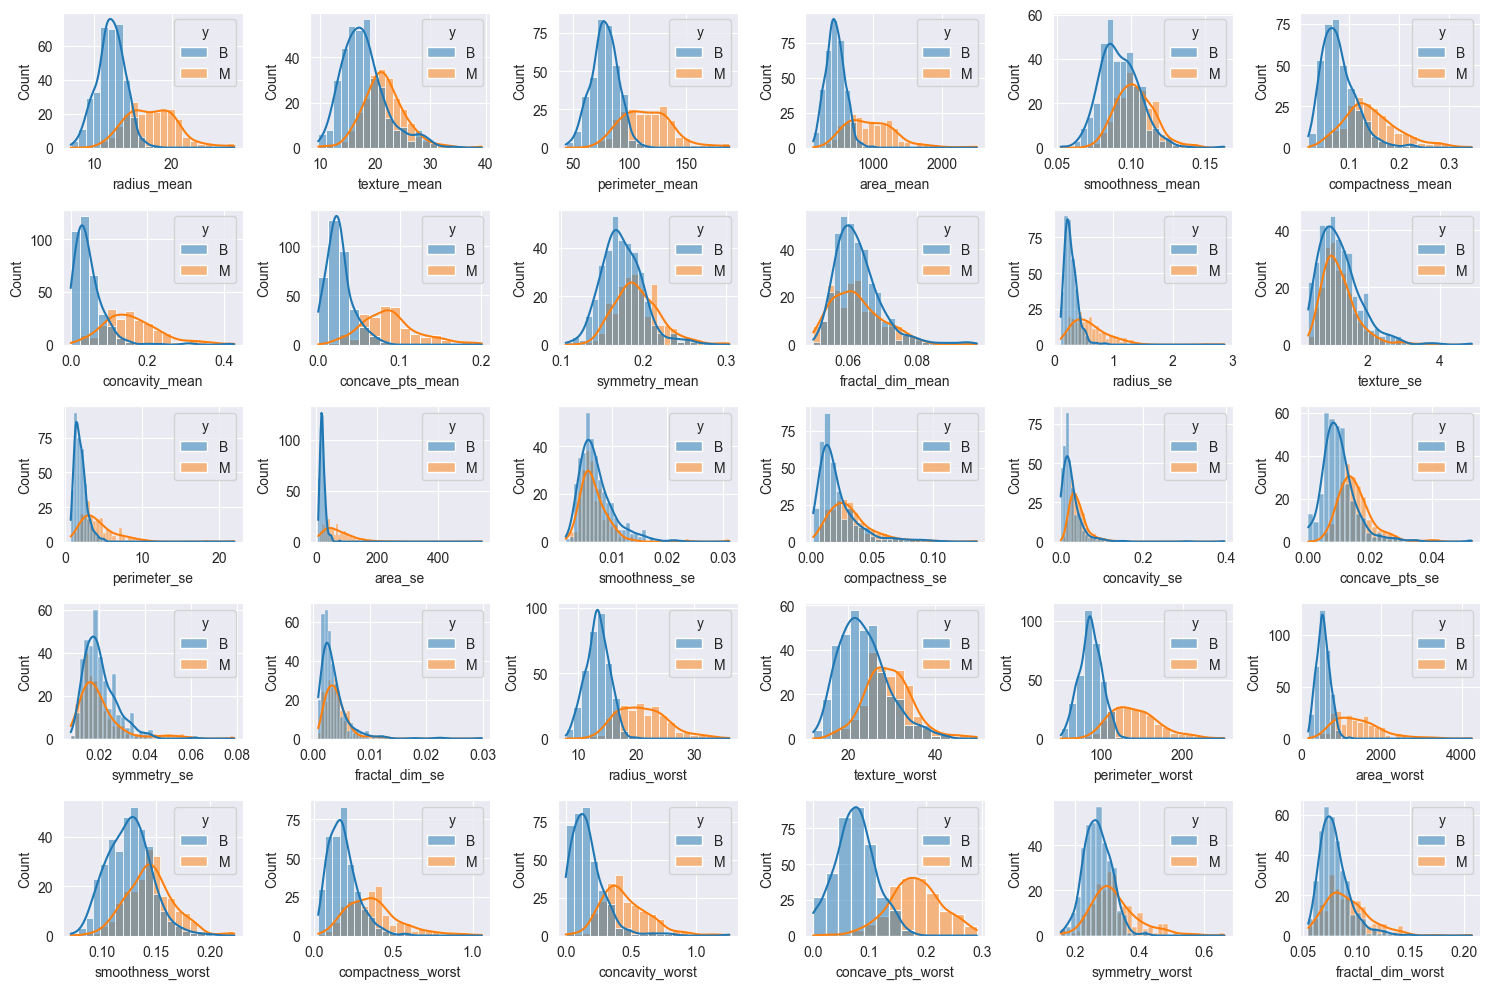

In [7]:
def histplots(df):
    n = 5
    m = 6
    col_num = 0

    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for i in range(n):
        for j in range(m):
                sns.histplot(df, x=df[df.columns[col_num]], ax=axes[i][j], kde=True, hue=df.columns[-1])
                col_num += 1

    plt.tight_layout()
    plt.show()


histplots(brca)

In [8]:
target = brca["y"].value_counts()
target

y
B    357
M    212
Name: count, dtype: int64

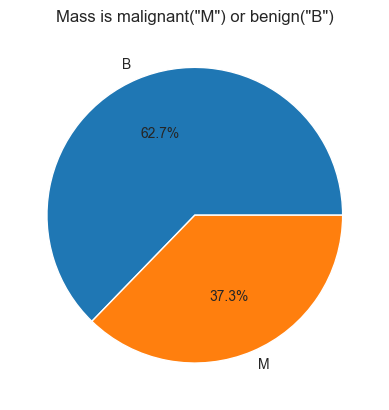

In [9]:
plt.pie(target, labels=target.index, autopct='%1.1f%%')
plt.title('Mass is malignant("M") or benign("B")')
plt.show()

In [10]:
X = brca.drop('y', axis=1)
y = brca['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
y_train.value_counts()

y
B    286
M    169
Name: count, dtype: int64

In [12]:
y_test.value_counts()

y
B    71
M    43
Name: count, dtype: int64

knn

In [13]:
knn_classificator = KNeighborsClassifier()
knn_parameters = {
    'n_neighbors': range(1, 15)
}

knn_grid_search = GridSearchCV(knn_classificator, knn_parameters, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

print("Best value for 'n_neighbors' hyperparameter is", knn_grid_search.best_params_['n_neighbors'])

Best value for 'n_neighbors' hyperparameter is 8


In [14]:
knn = knn_grid_search.best_estimator_

knn_test_acc = knn.score(X_test, y_test)
print("Test accuracy: ", knn_test_acc)

knn_train_acc = knn.score(X_train, y_train)
print("Train accuracy: ", knn_train_acc)

Test accuracy:  0.9385964912280702
Train accuracy:  0.9340659340659341


Logistic Regression

In [15]:
logr_classificator = LogisticRegression()
logr_parameters = {
    'max_iter': [10**i for i in range(1, 5)]
}

logr_grid_search = GridSearchCV(logr_classificator, logr_parameters, cv=5, scoring='accuracy')
logr_grid_search.fit(X_train, y_train)

print("Best value for 'max_iter' hyperparameter is", logr_grid_search.best_params_['max_iter'])

Best value for 'max_iter' hyperparameter is 10000


In [16]:
logr = logr_grid_search.best_estimator_

logr_test_acc = logr.score(X_test, y_test)
print("Test accuracy: ", logr_test_acc)

logr_train_acc = logr.score(X_train, y_train)
print("Train accuracy: ", logr_train_acc)

Test accuracy:  0.9473684210526315
Train accuracy:  0.9648351648351648


Decision Tree Classifier

In [17]:
dtc_classificator = DecisionTreeClassifier()
dtc_parameters = {
    'max_depth': [i for i in range(1, 10)]
}

dtc_grid_search = GridSearchCV(dtc_classificator, dtc_parameters, cv=5, scoring='accuracy')
dtc_grid_search.fit(X_train, y_train)

print("Best value for 'max_depth' hyperparameter is", dtc_grid_search.best_params_['max_depth'])

Best value for 'max_depth' hyperparameter is 3


In [18]:
dtc = dtc_grid_search.best_estimator_

dtc_test_acc = dtc.score(X_test, y_test)
print("Test accuracy: ", dtc_test_acc)

dtc_train_acc = dtc.score(X_train, y_train)
print("Train accuracy: ", dtc_train_acc)

Test accuracy:  0.9122807017543859
Train accuracy:  0.9758241758241758


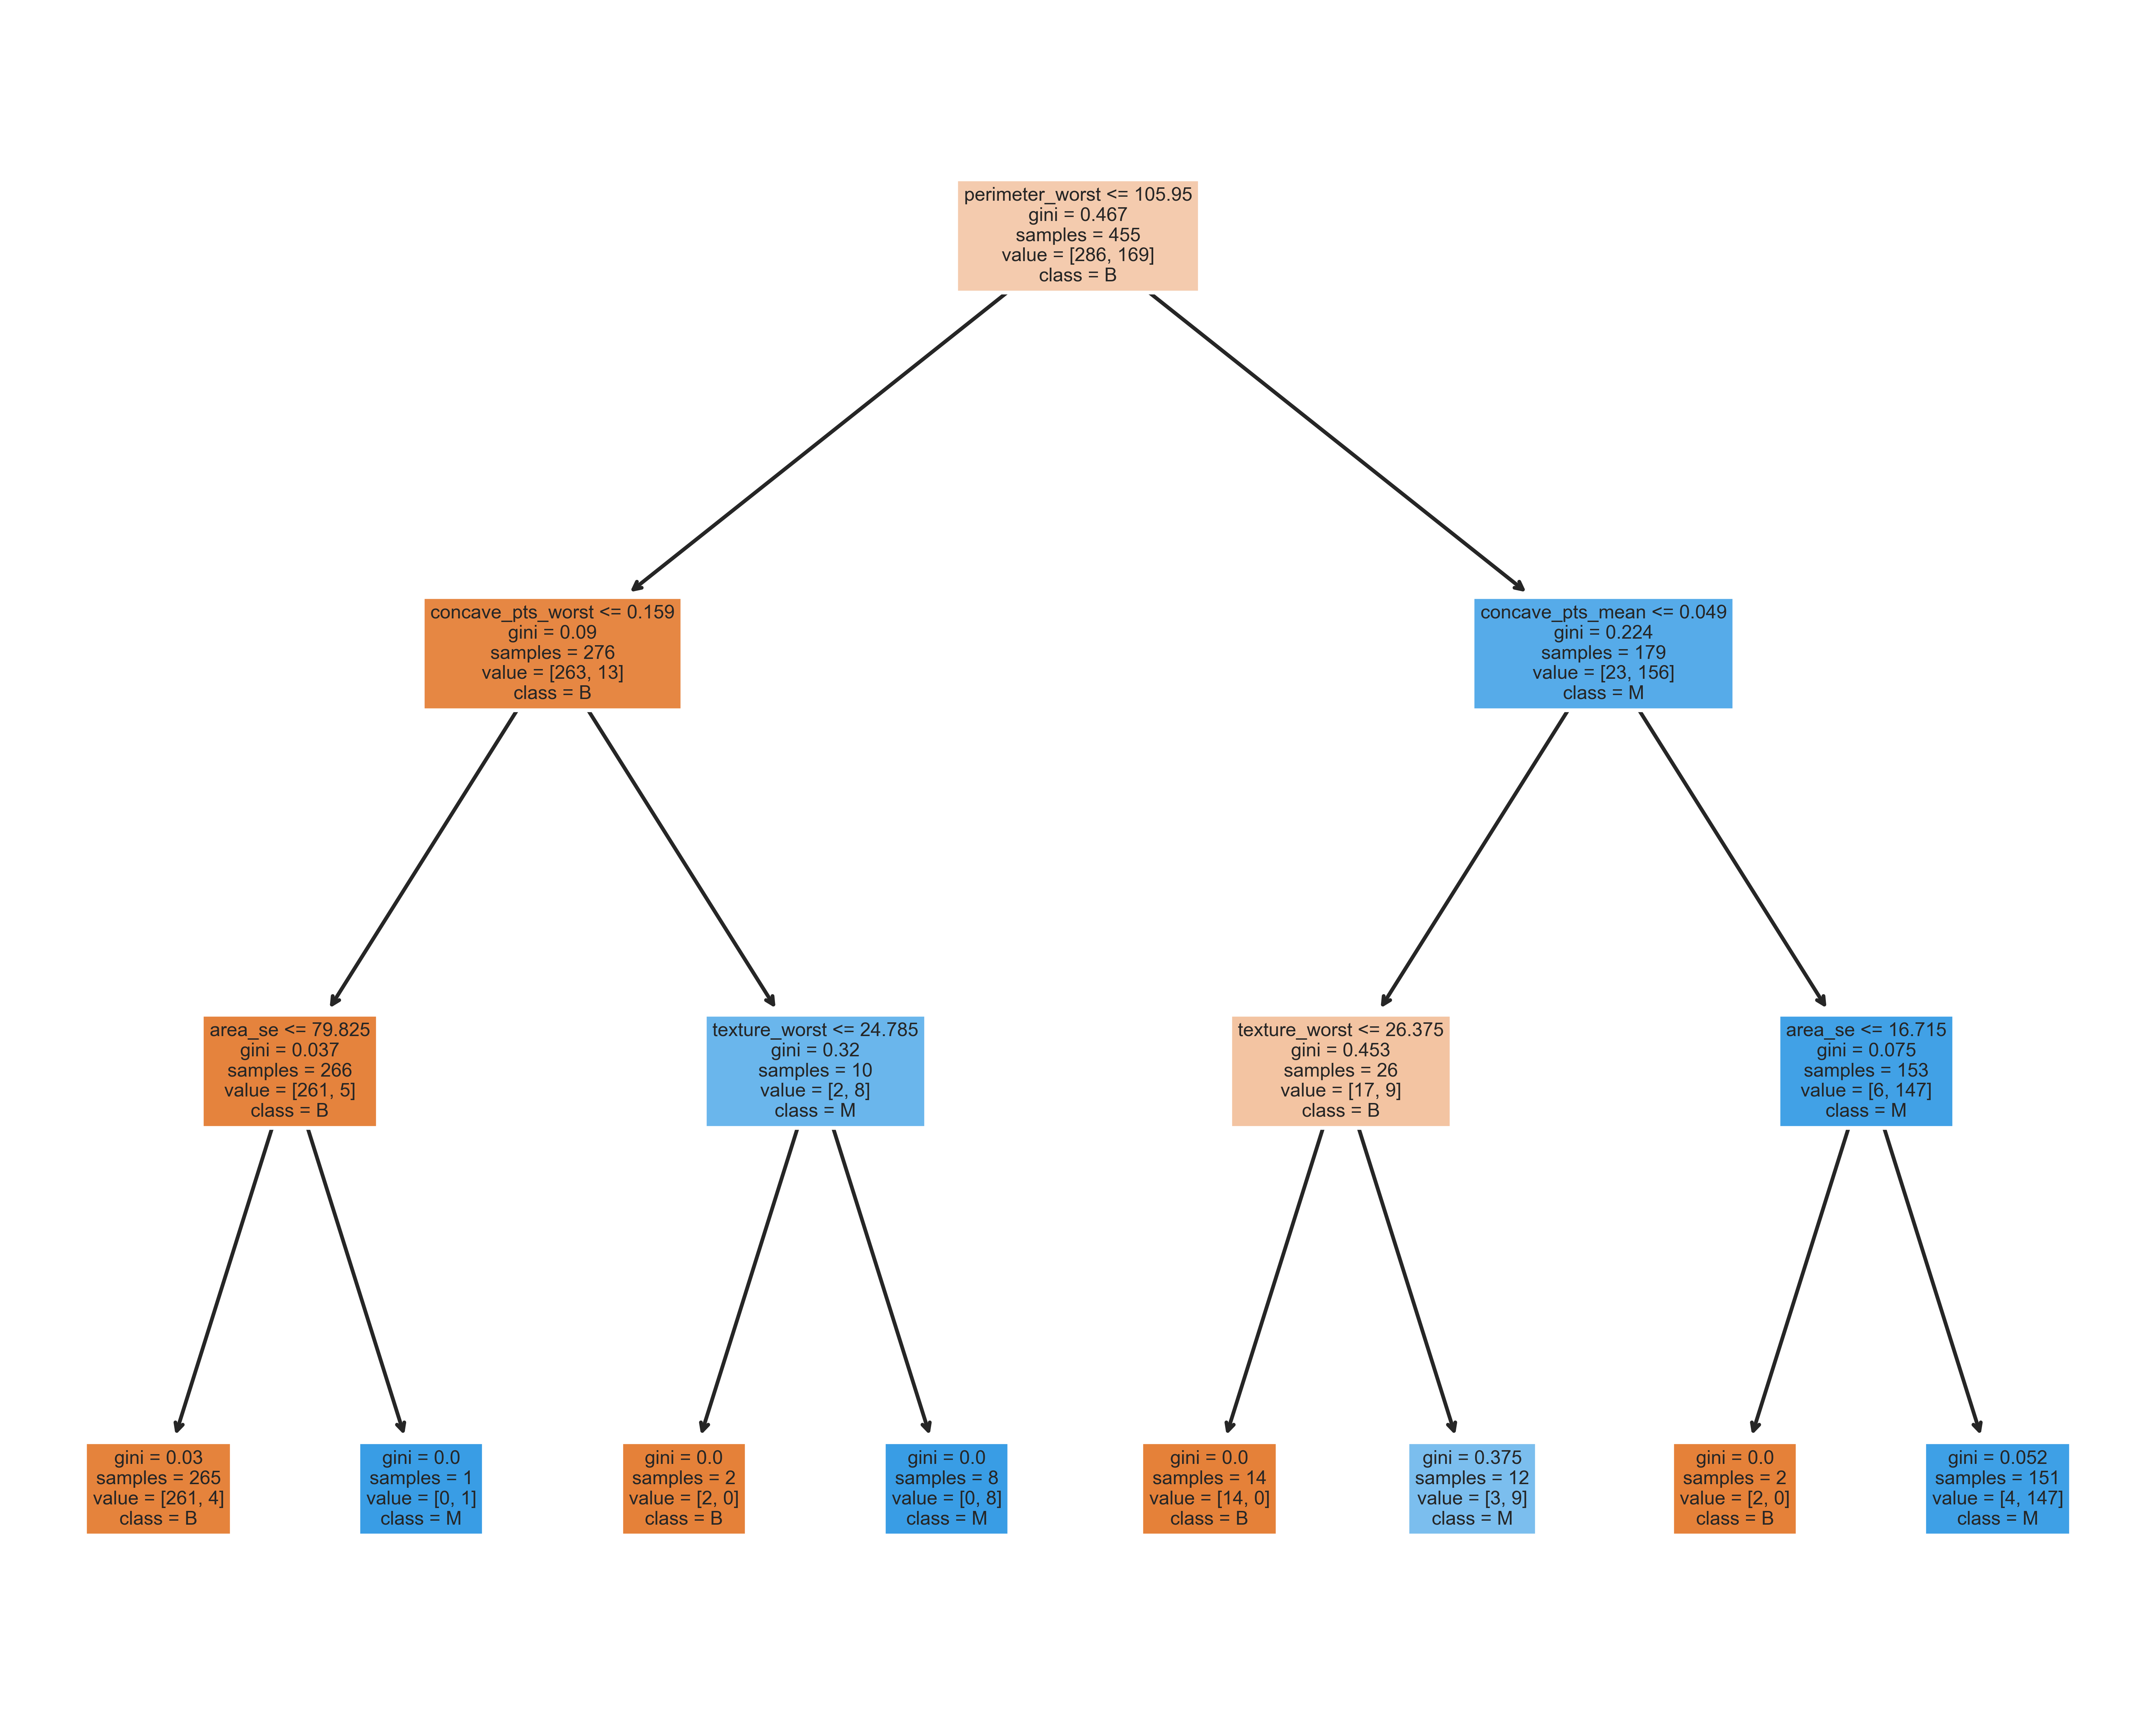

In [19]:
current_datetime = datetime.now()
timestamp_str = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

dpi = 750

plt.figure(figsize=(10, 8), dpi=dpi)
plot_tree(dtc, feature_names=brca.columns[:-1], class_names=target.index, filled=True)
filename = f'output/decision-tree/decisoin_tree_with_{dtc.max_depth}_max_depths_{timestamp_str}'
plt.savefig(filename)
plt.show()

In [20]:
importances = dtc.feature_importances_

sorted_indices = np.argsort(importances)[::-1] #desc
sorted_importances = importances[sorted_indices]

nonzero_indices = np.nonzero(sorted_importances)
sorted_importances = sorted_importances[nonzero_indices]

sorted_features = brca.columns[:-1][sorted_indices][nonzero_indices]

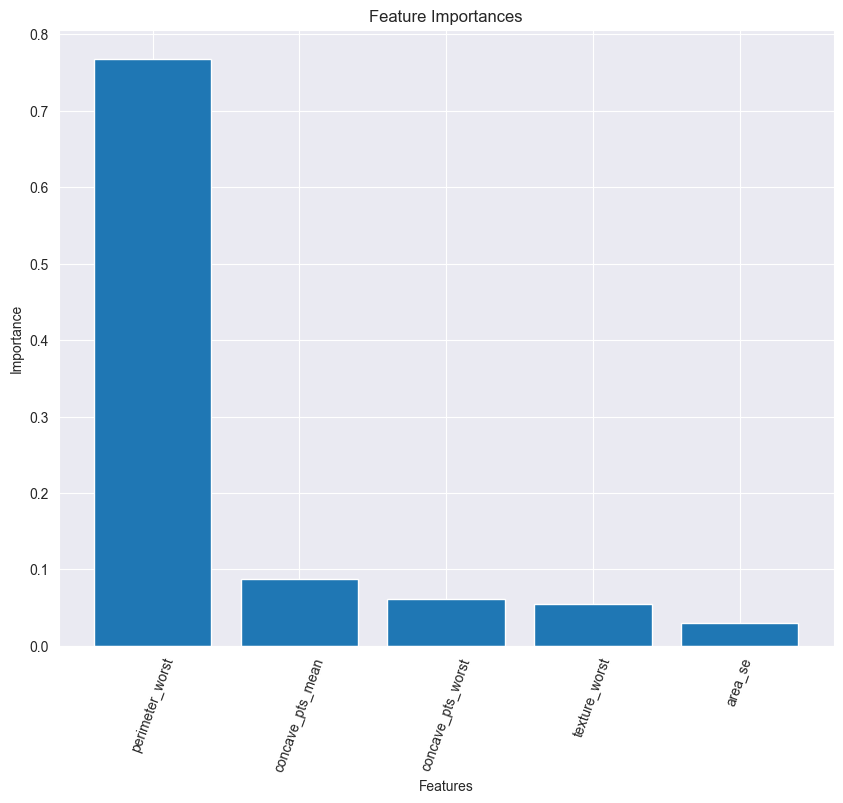

In [21]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(sorted_features)), sorted_importances, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=70)

filename = f'output/decision-tree/feature_importance_{timestamp_str}'
plt.savefig(filename)

plt.show()

Confusion matrix for each model

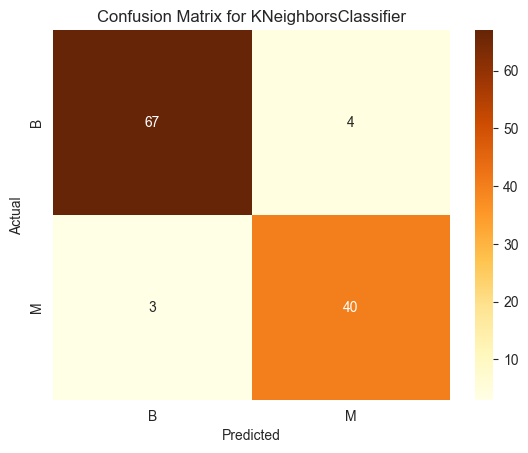

Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



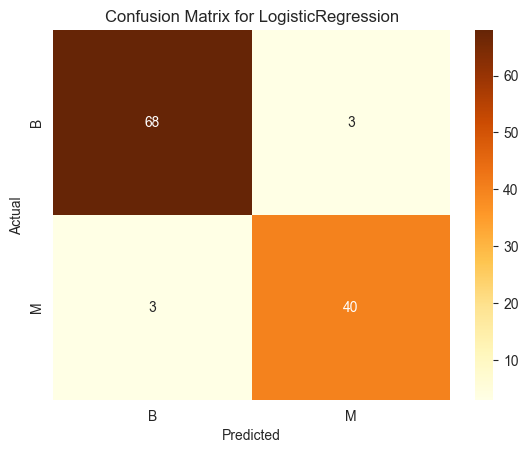

Classification report for LogisticRegression:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



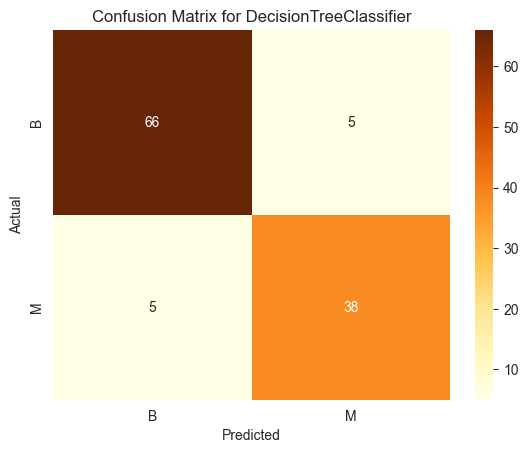

Classification report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           B       0.93      0.93      0.93        71
           M       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [22]:
models = [knn, logr, dtc]
names = ['KNeighborsClassifier', 'LogisticRegression', 'DecisionTreeClassifier']
class_labels = ['B', 'M']

for model, name in zip(models, names):
    confusion = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
    confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='YlOrBr')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    report = classification_report(y_test, model.predict(X_test))
    print(f'Classification report for {name}:', report, sep='\n')